##Python Assignment

In [4]:
#Load requisite packages and install them (Biopython)
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd


In [5]:
#Question 1: This code creates a function. The function is used, overall, to take a fasta file and pull out sequences. 

def get_sequences_from_file(fasta_fn):
    #This part is used to designate the input file (fasta_fn). 
    sequence_data_dict = {}
    #This initializes a dictionary for placing info into.
    for record in SeqIO.parse(fasta_fn, "fasta"):
        #looping through records in SeqIO, while running a parse function as well on the fasta file. 
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
        #This loop takes the sequences pulled from the fasta file, and assigns variables in the dictionary to different
        #information from the fasta file, providing each entry with a species name, description, etc. 
    return(sequence_data_dict)

In [6]:
#use the above function to grab sequences from our penguins file, then create a string out of one as a practice sequence for the
#next function I create. 
peng_seqs = get_sequences_from_file("penguins_cytb.fasta")
practice_seq = str(peng_seqs['Aptenodytes forsteri'])


In [7]:
#Question 2

def translate_function(string_nucleotides):
    #define new function acting on string_nucleotides
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_list = []
    stop_codons = ('TAA', 'TAG', 'AGA', 'AGG')
    #initialize three objects that will be useful later, including an empty list
    codons = [string_nucleotides[i:i+3] for i in range(0, len(string_nucleotides),3)]
    #set codons as a list that contains groups of 3 nucleotides from string_nucleotides starting at 0 and going to the
    #end, as items of that list.
    for codon in codons:
        if codon not in stop_codons:
            aa_list.extend(mito_table.forward_table[codon])
            #loop through each of the items in codons, translating each and adding them to the end of the empty list aa_list, 
            #but only if the codons are not known stop codons.
        else:
            break
            #exits the loop if we hit a stop codon
    aa_seq = ''.join(aa_list)
    #join all items of the aa_list into one string with no characters between the items.
    return(str(aa_seq))
    #gives new amino acid sequence as one string with no spaces.

In [8]:
translate_function(practice_seq)
#testing function

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [9]:
#Question 3

from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
#Import Seq to work with Seq objects, and IUPAC to give us alphabet types we can use.
def translate_easy(string_nucleotides):
    dna_as_seq = Seq(string_nucleotides, IUPAC.unambiguous_dna)
    #convert string of nucleotides into Seq object using the unambiguous dna alphabet
    aa_seq = dna_as_seq.translate(table='Vertebrate Mitochondrial', to_stop= True)
    #translates the Seq into amino acids using the standard table, to a stop codon using arguments from the biopython site. 
    return(aa_seq)
    #returns the translated seq

In [10]:
translate_easy(practice_seq)
#testing function

Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH', IUPACProtein())

In [11]:
#Question 4

practice_aa = Seq('MAPNLRKSHPLLKIINNSLIDLPTPSNISA', IUPAC.protein)
from Bio.SeqUtils.ProtParam import ProteinAnalysis
#import useful protein functions from Biopython
def mol_weight(aa_seq):
    #define new function
    aa_string = str(aa_seq)
    #change Seq containing amino acids to a string
    aa_analyzed = ProteinAnalysis(aa_string)
    #run protein analysis on aa_string
    return(aa_analyzed.molecular_weight())
    #returns molecular weight using biopython's molecular weight function

In [12]:
mol_weight(practice_aa)
#test function

3268.8268000000007

In [13]:
#Question 5

def GC_content(string_nucleotides):
    #define new function
    count = 0
    #set empty variable "count"
    for base in string_nucleotides:
        if base == 'G' or base == 'C':
            count +=1
            #loop through string and for every G or C, ratchet count up by 1
    gc = (count/len(string_nucleotides)) *100
    #takes count and divides by total string length, then multiplies by 100 to get percentage GC content
    return(gc)
#returns GC content as a percentage
        

In [14]:
GC_content(practice_seq)
#test function

48.38145231846019

In [15]:
#Main Assignment

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [16]:
#Question 6
penguins_df['Molecular Weight'] = 'NaN'
penguins_df['GC Content'] = 'NaN'
#adds new columns for molecular weight and gc content, and fills with NaN values

In [17]:
#Question 7

all_weights = []
all_GCs = []
#Initialize two lists for storing weights and GC contents
for key, value in cytb_seqs.items():
    nuc_string = str(value)
    aa_seq = translate_easy(nuc_string)
    molweight = mol_weight(aa_seq)
    GC = GC_content(nuc_string)
    #Loop through dictionary of species names (keys) and sequences (values), using translate and GC functions on values, and 
    #molecular weight function on amino acid sequence.
    all_weights.append(molweight)
    all_GCs.append(GC)
    #Append all molecular weights and GC contents to lists initialized above as they are passed through functions.
penguins_df['Molecular Weight'] = all_weights
penguins_df['GC Content'] = all_GCs
#Take newly completed lists and put them in appropriate columns in the data frame.

In [18]:
penguins_df
#Checking that the df is changed correctly

,species,mass,Molecular Weight,GC Content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


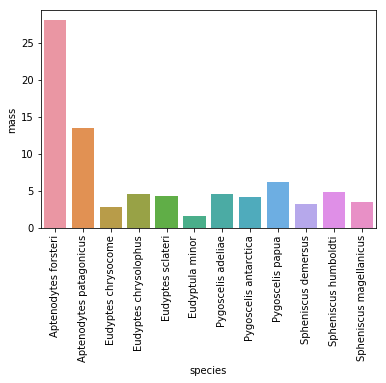

In [19]:
#Question 8 
import seaborn as sns
%matplotlib inline
#import seaborn and make the plots display after the cell that generated them.
b = sns.barplot(x= "species", y= "mass", data=penguins_df)
b.set_xticklabels(rotation=90, labels=penguins_df['species'])
#found a way to rotate axis labels here: https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

#Answers to questions: 
## *Q1* What is the smallest penguin species? 
#Eudyptula minor
## *Q2* What else is interesting about this species? 
#The original creator of linux was pecked by a penguin of this species, and chose the mascot for Linux to be "Tux" (a penguin)
#as a result (credit to the wikipedia article at https://en.wikipedia.org/wiki/Little_penguin)


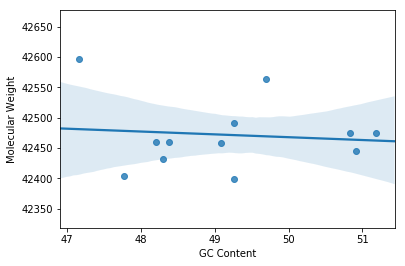

In [20]:
# Question 9

c = sns.regplot(x = "GC Content", y = "Molecular Weight", data = penguins_df)
#A simple scatter plot with regression line between GC content and mol weight. 

In [21]:
#Question 10
penguins_df.to_csv('penguins_mass_cytb.csv')
#found at https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file

In [ ]:
#Question 11
#If we were so inclined, we could use this dataset and Python to create primers for these sequences using 
#reverse complementation and other functions of biopython. Also, we could generate attributed of those primers such
#as melt temp, GC content, and if we were creative enough, self-annealing possibilities. 